# Enter Student Name & ID

In [1]:
student_id =   400101861
student_name = "ahmadreza majlesara"

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101861
your name: ahmadreza majlesara


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [19]:
def myPCA(X, num_components):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_standardized = (X - X_mean) / X_std
    
    covariance_matrix = np.cov(X_standardized, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    principal_components = sorted_eigenvectors[:, :num_components]
    X_pca = np.dot(X_standardized, principal_components)
    
    return X_pca, principal_components, sorted_eigenvalues[:num_components]

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

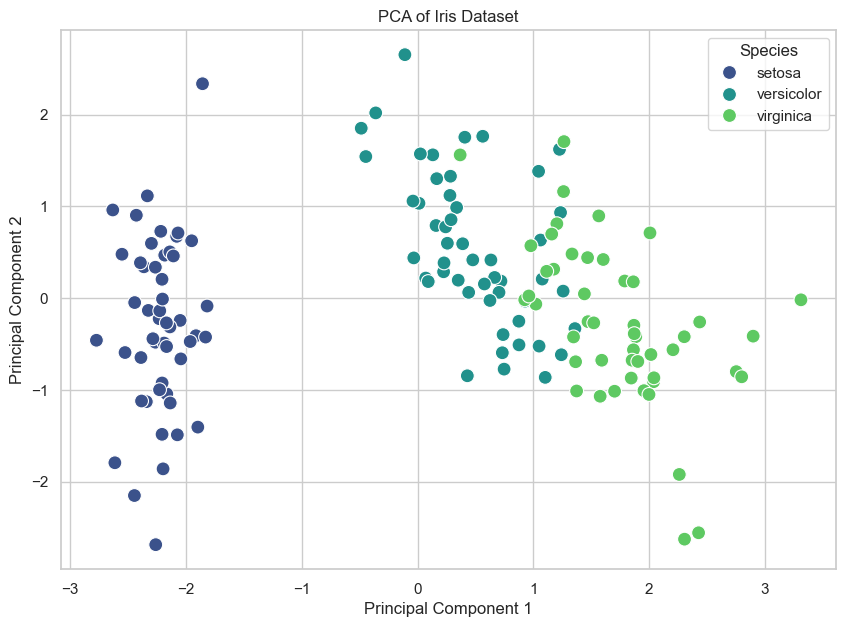

In [20]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

num_components = 2
X_pca, components, explained_variance = myPCA(X, num_components)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df['target_name'] = [target_names[i] for i in y]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target_name', palette='viridis', s=100, alpha=1)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

Eigenfaces are the principal components derived from a set of facial images using Principal Component Analysis (PCA). Each eigenface represents a pattern capturing significant variance in the face dataset, allowing dimensionality reduction while retaining essential features. They are used in facial recognition by projecting new face images into this reduced eigenface space for efficient comparison and classification. Essentially, eigenfaces simplify the complexity of face images into a few key components for analysis.


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [6]:
!pip install scikit-image
!pip install opencv-python

You should consider upgrading via the 'c:\users\digi max\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [7]:
import os
import numpy as np
from PIL import Image

In [8]:
def load_orl_dataset(dataset_path):
    images = []
    labels = []
    for label in range(1, 41):
        folder_path = os.path.join(dataset_path, f's{label}')
        for image_name in range(1, 11):
            image_path = os.path.join(folder_path, str(image_name)+'.bmp')
            image = Image.open(image_path).convert('L') 
            images.append(np.array(image).flatten())
            labels.append(label)
    return np.array(images), np.array(labels)

def split_dataset(images, labels):
    train_images, test_images, train_labels, test_labels = [], [], [], []
    for label in range(1, 41):
        label_indices = np.where(labels == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:5]
        test_indices = label_indices[5:]
        train_images.extend(images[train_indices])
        test_images.extend(images[test_indices])
        train_labels.extend(labels[train_indices])
        test_labels.extend(labels[test_indices])
    return np.array(train_images), np.array(test_images), np.array(train_labels), np.array(test_labels)


In [21]:
dataset_path = 'E:/uni/term 6/ML/assignments/HW4/practical/Q1/ORL'  
images, labels = load_orl_dataset(dataset_path)
train_images, test_images, train_labels, test_labels = split_dataset(images, labels)
num_components = 50
train_images_pca, components, explained_variance = myPCA(train_images, num_components)
test_images_standardized = (test_images - np.mean(train_images, axis=0)) / np.std(train_images, axis=0)
test_images_pca = np.dot(test_images_standardized, components)

In [22]:
print("train images pca shape ="+ str(train_images_pca.shape)) 
print("train labels shape = " + str(train_labels.shape))
print("test images pca shape ="+ str(test_images_pca.shape))
print("test labels shape = " + str(test_labels.shape))
print(test_images_pca[0:5])

train images pca shape =(200, 50)
train labels shape = (200,)
test images pca shape =(200, 50)
test labels shape = (200,)
[[-3.51755397e+01  1.56523417e+01 -4.09296014e-01  2.14630603e+00
  -2.07092728e+01 -2.72680557e+01  8.11199336e+00  4.83939689e+00
   8.39491668e+00 -6.48679012e+00 -5.54175090e+00 -1.52564531e+00
   3.33946924e+00 -3.85747812e+00 -1.29490626e+00 -7.67511129e+00
   4.47250011e+00  1.06716926e+01 -3.30227631e-01 -4.18366916e+00
   1.67950618e-01 -1.67296183e-01 -5.40272154e+00 -2.99382654e+00
   2.61236125e+00 -1.53787495e+00 -5.02661891e+00  3.59532853e+00
  -3.39651177e+00  8.44437663e-01 -1.80587994e+00  3.71869982e-01
  -2.02830000e+00 -1.73881141e+00 -1.65947344e+00  2.61163232e+00
   4.98443589e+00 -1.69877722e+00  4.67523332e+00 -3.36568182e+00
   5.88753651e-01  8.75737930e+00  2.21454381e+00  5.92803554e-01
  -1.62059441e+00  2.66485821e+00  3.25132473e+00 -1.61930830e+00
   1.23768180e+00 -5.98239748e-01]
 [-3.97048863e+01 -2.53344565e+01 -6.87655906e+00 -

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [32]:
lda = LDA()
lda.fit(train_images_pca, train_labels)
test_labels_pred = lda.predict(test_images_pca)
accuracy = accuracy_score(test_labels, test_labels_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 98.00%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [35]:
componentlist = range(40,101)
accuracylist = []
max_accuracy = 0
best_num_components = 0
for num_components in componentlist:
    print(num_components)
    train_images_pca, components, explained_variance = myPCA(train_images, num_components)
    test_images_standardized = (test_images - np.mean(train_images, axis=0)) / np.std(train_images, axis=0)
    test_images_pca = np.dot(test_images_standardized, components)
    lda = LDA()
    lda.fit(train_images_pca, train_labels)
    test_labels_pred = lda.predict(test_images_pca)
    accuracy = accuracy_score(test_labels, test_labels_pred)
    accuracylist.append(accuracy)

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_num_components = num_components

40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


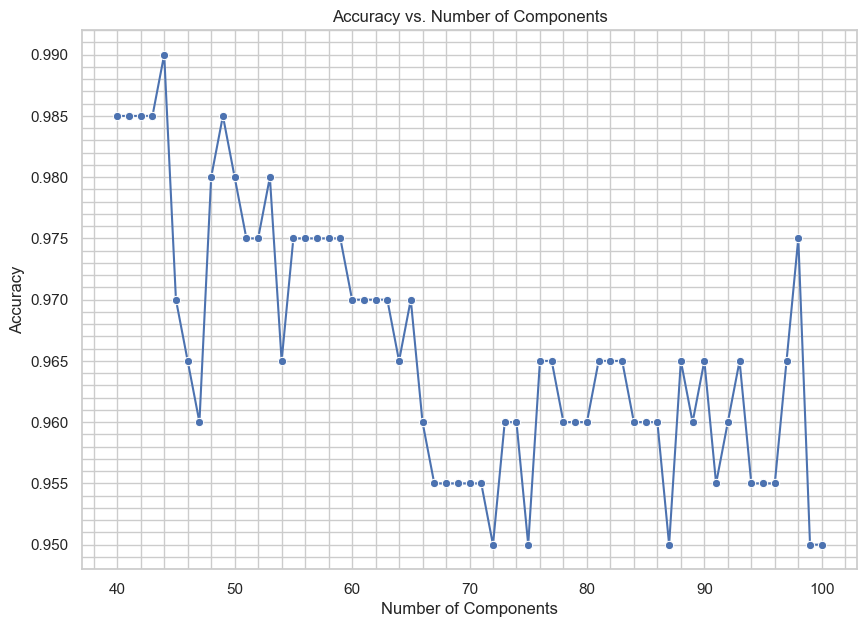

best dimension is 44 with accuracy = 0.99


In [44]:
results_df = pd.DataFrame({
    'Number of Components': componentlist,
    'Accuracy': accuracylist
})
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.lineplot(data=results_df, x='Number of Components', y='Accuracy', marker='o')
plt.title('Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True, 'both')
plt.minorticks_on()
plt.show()
print(f"best dimension is {best_num_components} with accuracy = {max_accuracy}")